# Baymer Tutorial

Baymer can be run either using the baymer package by running each script directly. This markdown will demonstrate primarily how to run baymer by importing different scripts, however, the commands to run each script individually will also be shown.

The first part of the tutorial will demonstrate the standard baymer pipeline and subsequently a few downstream applications will be described.

## Standard Baymer Pipeline

Baymer expects jsons of the following format as as input files:

{Context: [A polymorphisms, C polymorphisms, G polymorphisms, T polymorphisms, total contexts, context reference index, list reference index], ...}

where the "context reference index" is the 0-indexed position of the reference nucleotide in the context and "list reference index" is the position in the list of the reference nucleotide. Therefore, for the 3-mer context "AAA", the context reference index would be 1 and the list reference index would be 0.

Note that the input json should only contain a single context reference index and sequence context length. In other words, all contexts should be of uniform length (e.g all 3-mers) and should have the same nucleotide in scope (e.g for 3-mers the central nucleotide is the polymorphic nucleotide for all context counts enumerated).

Generating these files necessitates counting both the contexts and the polymorphism counts. We have provided scripts to count these quantities and format the proper json if desired.

Note that for all of the following tutorial we will be using 5-mer sequence context windows for speed purposes, but the mer length can be designated as desired. The only caveat being that this will necessitate adjusting the buffer on the BED file to accomodate the given sequence context length (described in further detail below).

### Counting Contexts

#### Inputs

Note flags for standalone script and named arguments for imported modules indicated as follows at the beginning **(-a/named argument)**

* **(-c/config_file)** config file
    * The format of this file can be found [here](https://github.com/bvoightlab/Baymer/blob/main/tutorial_data/context_and_mutation_counter_config.yaml)
    * The FASTA files designated must be trimmed to only include the feature region of interest. We recommend using [BEDtools](https://bedtools.readthedocs.io/en/latest/content/tools/getfasta.html) to accomplish this. We also recommend adding a buffer to the trimming BED file (can be accomplished using [BEDtools slop](https://bedtools.readthedocs.io/en/latest/content/tools/slop.html)) to extract the FASTAs to account for the overhang of the sequence context allowing the first position in the feature to be included. Otherwise this locus could only be considered as a member of the flanking nucleotides in the sequence contexts ultimately counted. 
* **(--feature/feature)** feature of interest (must be designated in the config file)
* **(-m/mer_length)** the size of the sequence context desired to be counted
* **(--co/context_output_file)** the desired output file location and name
* **(-a/alternation_order)** the alternation order for adding nucleotides
    * this flag specifies how nucleotides are added to grow contexts. Default is to alternate context expansions starting with the *right* (aka 5') side. Inclusion of this flag designates the opposite alternation pattern should be used (i.e for the first context expansion, add a nucleotide to the *left* (aka 3') side)
* **(-u/unfolded)** whether you want folded or unfolded sequence contexts i.e T central nucleotides are folded to A contexts and G nucleotides to C
* **(-h/high_confidence)** whether you only want to use high-confidence bases from the FASTAs (this assumes they are designated as such with capital letters)

#### Running standalone script

python baymer/context_counter.py 
    **-c** tutorial_data/context_and_mutation_counter_config.yaml 
    **--feature** cpg_islands 
    **-m** 5 
    **--co** tutorial_data/tutorial_outs/tutorial_count_files/context_count_out.tsv 
    **-h**


#### Running in python script

In [3]:
from baymer import context_counter

config_file = "tutorial_data/context_and_mutation_counter_config.yaml"
context_count_output_file = "tutorial_data/tutorial_outs/tutorial_count_files/context_count_out.tsv"

# run context counter
context_counter.driver(config_file = config_file, 
                       feature = "cpg_islands", 
                       mer_length = 5, 
                       context_output_file = context_count_output_file,
                       alternation_order = "right",
                       unfolded = False,
                       high_confidence = True)

Output file successfully saved


### Counting Mutations

#### Inputs

Note flags for standalone script and named arguments for imported modules indicated as follows at the beginning **(-a/named argument)**

* **(-c/config_file)** config file
    * The format of this file can be found [here](https://github.com/bvoightlab/Baymer/blob/main/tutorial_data/context_and_mutation_counter_config.yaml)
    * Note that this is the same config file as used in the context counting script
* **(--feature/feature)** feature of interest (must be designated in the config file)
* **(-p/pop)** the population of interest (must be designated in the config file)
* **(-m/mer_length)** the size of the sequence context desired to be counted
* **(--mo/mutation_output_file)** the desired output file location and name
* **(--ac/allele_count)** specifies the allele count you would like to count
* **(--min/min_bool)** specifies that you would like to count *at least* the number of alleles specified (i.e with this option the script will count the # of alleles specified or greater)
* **(-a/alternation_order)** the alternation order for adding nucleotides
    * this flag specifies how nucleotides are added to grow contexts. Default is to alternate context expansions starting with the *right* (aka 5') side. Inclusion of this flag designates the opposite alternation pattern should be used (i.e for the first context expansion, add a nucleotide to the *left* (aka 3') side)
* **(-u/unfolded)** whether you want folded or unfolded sequence contexts i.e T central nucleotides are folded to A contexts and G nucleotides to C
* **(-h/high_confidence)** whether you only want to use high-confidence bases from the FASTAs (this assumes they are designated as such with capital letters)
* **(--ac-syntax/ac_syntax)** syntax of allele count information. Default uses "AC"
    * this essentially controls for the syntax of population names 
    * if specified, will use this string to search for allele count information
    * These designations are expected to be found in the vcf info column
* **(--an-syntax/an_syntax)** syntax of allele number information. Default uses "AN"
    * this essentially controls for the syntax of population names 
    * if specified, will use this string to search for allele number information
    * These designations are expected to be found in the vcf info column
* **(--quality/quality_filter)** syntax of quality score information. Default: Quality scores are not collected
    * this controls the quality score that is to be collected
    * These designations are expected to be found in the vcf info column
    
#### Running standalone script

python baymer/mutation_counter.py 
    **-c** tutorial_data/context_and_mutation_counter_config.yaml 
    **--feature** cpg_islands 
    **-p** AFR 
    **-m** 5 
    **--mo** tutorial_data/tutorial_outs/tutorial_count_files/AFR/AFR_mutation_count_out.tsv 
    **--ac** 1 
    **--min** 
    **-h** 
    **--ac-syntax** "AC"
    **--an-syntax** "AN"
    

#### Running in python script

In [4]:
from baymer import mutation_counter

mutation_count_output_file = "tutorial_data/tutorial_outs/tutorial_count_files/AFR/AFR_mutation_count_out.tsv"

# run context counter
mutation_counter.driver(config_file = config_file, 
                       feature = "cpg_islands",
                       pop = "AFR",
                       mer_length = 5, 
                       mutation_output_file = mutation_count_output_file,
                       allele_count = 1,
                       min_bool = True,
                       alternation_order = "right",
                       unfolded = False,
                       high_confidence = True,
                       ac_syntax = "AC",
                       an_syntax = "AN",
                       quality_filter = None
                       )

['AC', 'AN', 1, True, None]
chr1
VCF REF matched ancestral:  12284
VCF ALT matched ancestral:  0
Could not find ancestral match:  0
Fasta ref and vcf ref don't match:  0
Invalid mers found:  1601
Total size of df before qc:  12284
Output file successfully saved
tutorial_data/tutorial_outs/tutorial_count_files/AFR/AFR_mutation_count_out.tsv


### Combine mutations and contexts into Baymer input json

#### Inputs

Note flags for standalone script and named arguments for imported modules indicated as follows at the beginning **(-a/named argument)**

* **(-c/config_file)** config file
    * The format of this file can be found [here](https://github.com/bvoightlab/Baymer/blob/main/tutorial_data/context_and_mutation_counter_config.yaml)
    * Note that this is the same config file as used in the context counting  and mutation counting scripts
* **(--mc/mutation_count_file)** output tsv of the mutation counting script
* **(--cc/context_count_file)** output tsv of the context counting script
* **(-p/pop)** the population of interest (must be designated in the config file)
* **(-o/output_dir)** the desired output directory
* **(-f/feature)** feature of interest (must be designated in the config file)
* **(-d/dataset)** the dataset of the data used. Must be one of "ODD", "EVEN" or "ALL", which correspond to which base pairs are being used
* **(--max-af/max_af)** The maximum allele frequency of variants that are to be included. Defaults to 0.85
* **(--min-af/min_af)** The minimum allele frequency of variants that are to be included. Defaults to 0
* **(--min-ac/min_ac)** The minimum allele count of variants that are to be included. Defaults to 1
* **(--quality/quality)** Filter to use on the quality score -- i.e only variants with quality > quality score are included. Optional.

#### Running standalone script

python baymer/generate_count_json.py 
    **-c** tutorial_data/context_and_mutation_counter_config.yaml 
    **-f** cpg_islands 
    **-p** AFR 
    **--mc** tutorial_data/tutorial_outs/tutorial_count_files/AFR/AFR_mutation_count_out.tsv 
    **--cc** tutorial_data/tutorial_outs/tutorial_count_files/context_count_out.tsv 
    **-d** ALL 
    **-o** tutorial_data/tutorial_outs/tutorial_jsons/AFR/
    

#### Running in python script

In [5]:
from baymer import generate_count_json

output_dir = "tutorial_data/tutorial_outs/tutorial_jsons/AFR/"


# run context counter
generate_count_json.driver(config_file = config_file, 
                           mutation_count_file = mutation_count_output_file,
                           context_count_file = context_count_output_file,
                           pop = "AFR",
                           output_dir = output_dir,
                           feature = "cpg_islands",
                           dataset = "ALL",
                           max_af = 0.85,
                           min_af = 0,
                           min_ac = 1,
                           quality = False)

variants counted from mutation file:  12000
mean ac:  48.54025
median ac:  3.0
min ac:  1.0
max ac:  855.0
mean af:  0.048181174045319526
2
number of missing contexts:  7
max count dict generated


### Run Baymer

#### Inputs

Note flags for standalone script and named arguments for imported modules indicated as follows at the beginning **(-a/named argument)**

* **(-c/data_config_file)** config file holding the count jsons for the data to be modelled
    * The format of this file can be found [here](https://github.com/bvoightlab/Baymer/blob/main/tutorial_data/tutorial_outs/tutorial_jsons/EAS/1_5mer.EAS.cpg_islands.hardcoded_count_files.yaml)
    *This config is automatically generated in the *generate_count_json* script
* **(-p/param_config_file)** config file holding the hyperparameter data for running baymer
    * The format of this file can be found [here](https://github.com/bvoightlab/Baymer/blob/main/tutorial_data/baymer_parameter_config.yaml)
* **(-o/output_dir)** the desired output directory
* **(-r/random_seed_index)** random seed *index* to use, corresponding to the random seed list in the parameter config file
* **(-z/zero_init)** boolean that sets all thetas to be initialized in the spike and their indicators initialized accordingly
* **(-t/num_threads)** specifies the number of threads to parallelize across. Defaults to the maximum number detectable

#### Running standalone script

python baymer/run_baymer.py 
    **-c** tutorial_data/tutorial_outs/tutorial_jsons/AFR/1_5mer.ALL.AFR.cpg_islands.hardcoded_count_files.yaml 
    **-p** tutorial_data/baymer_parameter_config.yaml 
    **-r** 0


#### Running in python script

In [6]:
from baymer import run_baymer, baymer_mcmc_functions

data_config_file = "tutorial_data/tutorial_outs/tutorial_jsons/AFR/1_5mer.ALL.AFR.cpg_islands.hardcoded_count_files.yaml"
parameter_config_file = "tutorial_data/baymer_parameter_config.yaml"

# run baymer for the first random seed specified
run_baymer.driver(data_config_file = data_config_file, 
                  param_config_file = parameter_config_file,
                  random_seed_index = 0)



Number of threads:  8
Tree layer: 0
layer_size:  2
total_leaves:  1024
layer arrays initialized
Total posterior from phi:  0.0
Total posterior from alpha:  0.0
Total posterior from likelihood:  -83724.83159362216
Total posterior from set probability:  0
JOINT POSTERIOR:  -83724.83159362216
Tree layer: 1
layer_size:  8
total_leaves:  256
layer arrays initialized
Total posterior from phi:  -508.559370093474
Total posterior from alpha:  -55.38264626209911
Total posterior from likelihood:  -74838.72332300177
Total posterior from set probability:  0.0
JOINT POSTERIOR:  -75402.66533935735
Tree layer: 2
layer_size:  32
total_leaves:  64
layer arrays initialized
Total posterior from phi:  -3132.9912366203507
Total posterior from alpha:  -87.96391025991888
Total posterior from likelihood:  -73280.52060892861
Total posterior from set probability:  1.313448704779148
JOINT POSTERIOR:  -76500.1623071041
Tree layer: 3
layer_size:  128
total_leaves:  16
layer arrays initialized
Total posterior from p

In order to run multiple chains (strongly recommended), the random seed index needs to be incremented, corresponding to the random seed given in the config file.

In [7]:
# run baymer for the second random seed specified
run_baymer.driver(data_config_file = data_config_file, 
                  param_config_file = parameter_config_file,
                  random_seed_index = 1)

Number of threads:  8
Tree layer: 0
layer_size:  2
total_leaves:  1024
layer arrays initialized
Total posterior from phi:  0.0
Total posterior from alpha:  0.0
Total posterior from likelihood:  -83134.76246105222
Total posterior from set probability:  0
JOINT POSTERIOR:  -83134.76246105222
Tree layer: 1
layer_size:  8
total_leaves:  256
layer arrays initialized
Total posterior from phi:  -610.0814373938044
Total posterior from alpha:  -59.977766112233695
Total posterior from likelihood:  -73472.5197151288
Total posterior from set probability:  0.0
JOINT POSTERIOR:  -74142.57891863484
Tree layer: 2
layer_size:  32
total_leaves:  64
layer arrays initialized
Total posterior from phi:  -1742.0660009880098
Total posterior from alpha:  -94.89538206551833
Total posterior from likelihood:  -72864.75630784043
Total posterior from set probability:  1.74992835521698
JOINT POSTERIOR:  -74699.96776253874
Tree layer: 3
layer_size:  128
total_leaves:  16
layer arrays initialized
Total posterior from 

### Check posterior distributions and summarize data

#### Inputs

Note flags for standalone script and named arguments for imported modules indicated as follows at the beginning **(-a/named argument)**

* **(-c/config_file)** config file holding the hyperparameter data for running baymer
    * The format of this file can be found [here](https://github.com/bvoightlab/Baymer/blob/main/tutorial_data/baymer_parameter_config.yaml)
    * Note that this is the same file as for the run_baymer script
    * This script assumes that all the random seeds within the config file have been run
* **(-p/plot_phis)** indicates whether you would like to plot the phi plots or not. Note that this becomes perilous with mers > 5 due to the exponential increase for each layer
* **(-e/empirical_value_config_file)** config file holding count jsons that will be used to also plot the phi 
    * The format of this file can be found [here](https://github.com/bvoightlab/Baymer/blob/main/tutorial_data/tutorial_outs/tutorial_jsons/EAS/1_5mer.EAS.cpg_islands.hardcoded_count_files.yaml)
    *This config is automatically generated in the *generate_count_json* script

#### Running standalone script

python baymer/plot_baymer_posterior_distributions.py
    **-c** tutorial_data/baymer_parameter_config.yaml

#### Running in python script

LAYER:  0
LAYER:  1
LAYER:  2
LAYER:  3
LAYER:  4


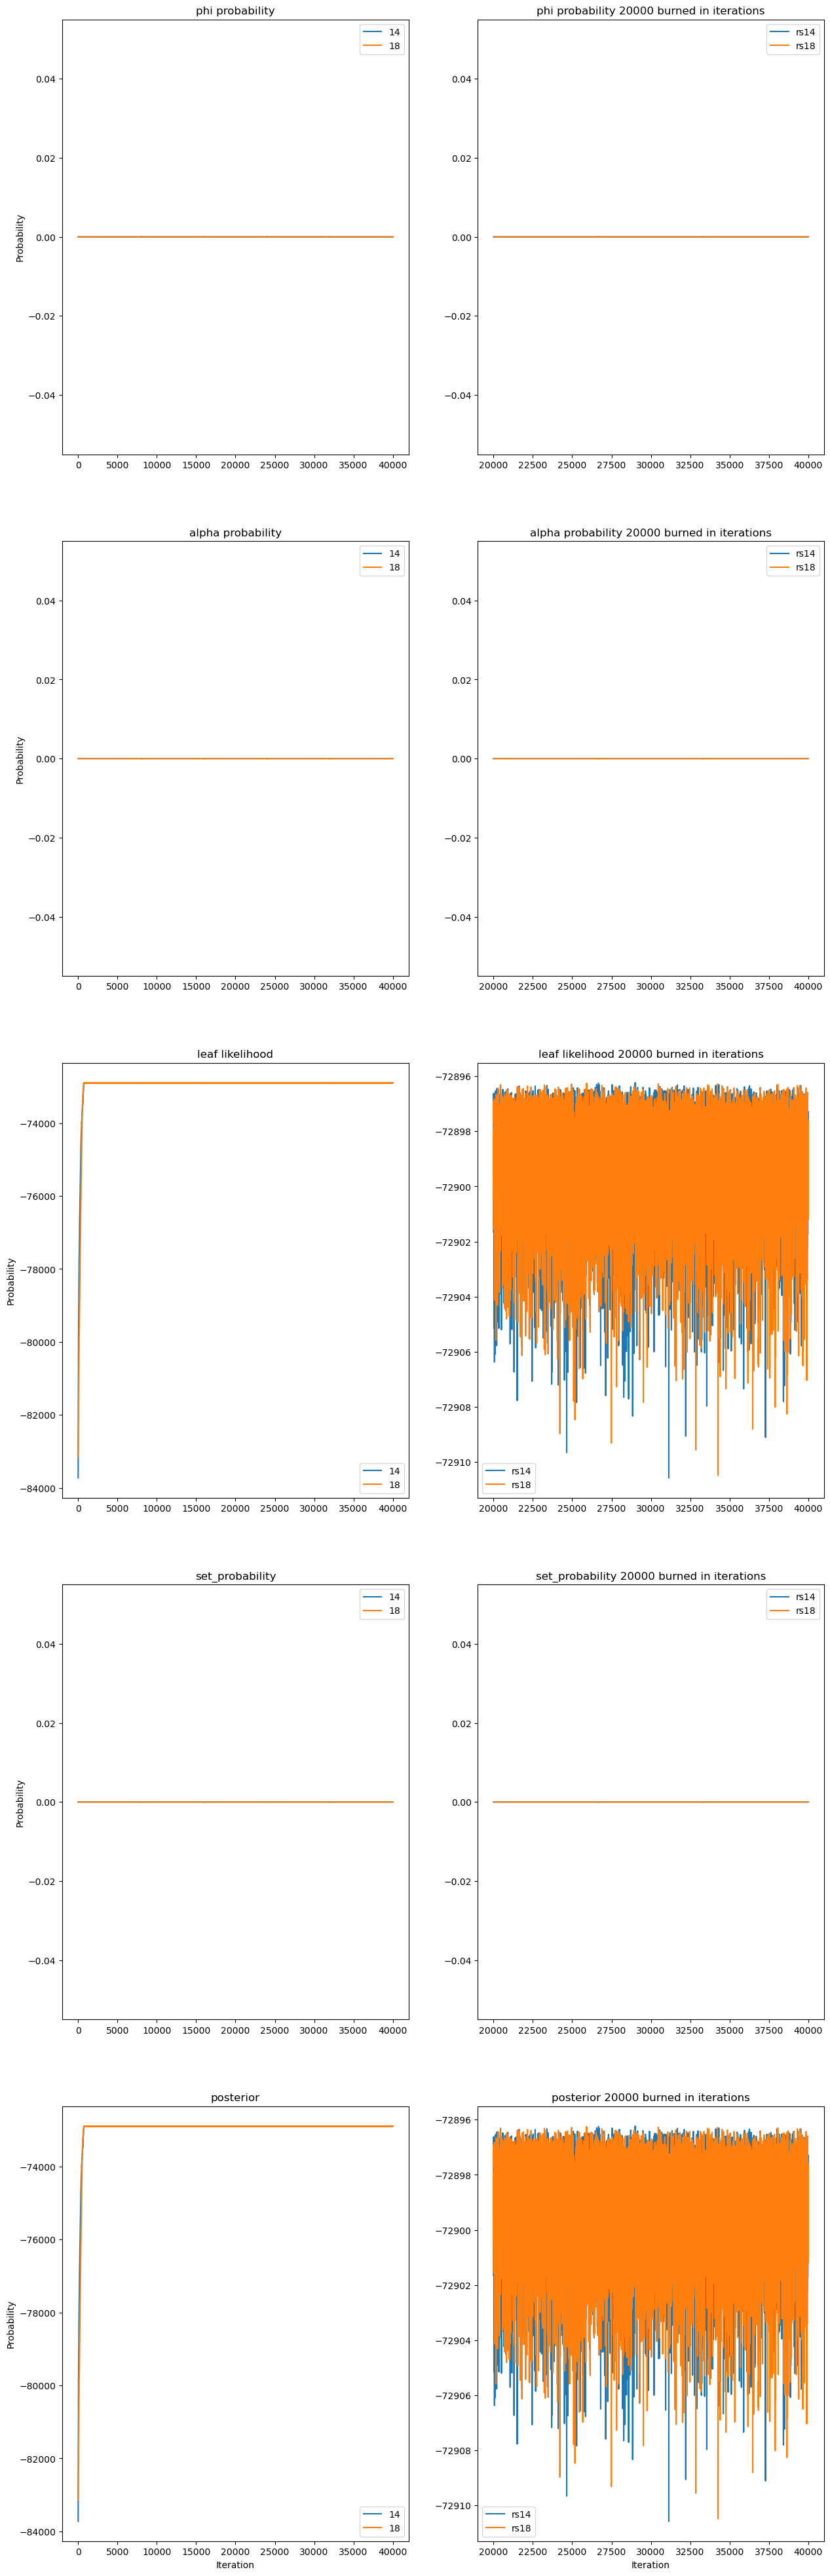

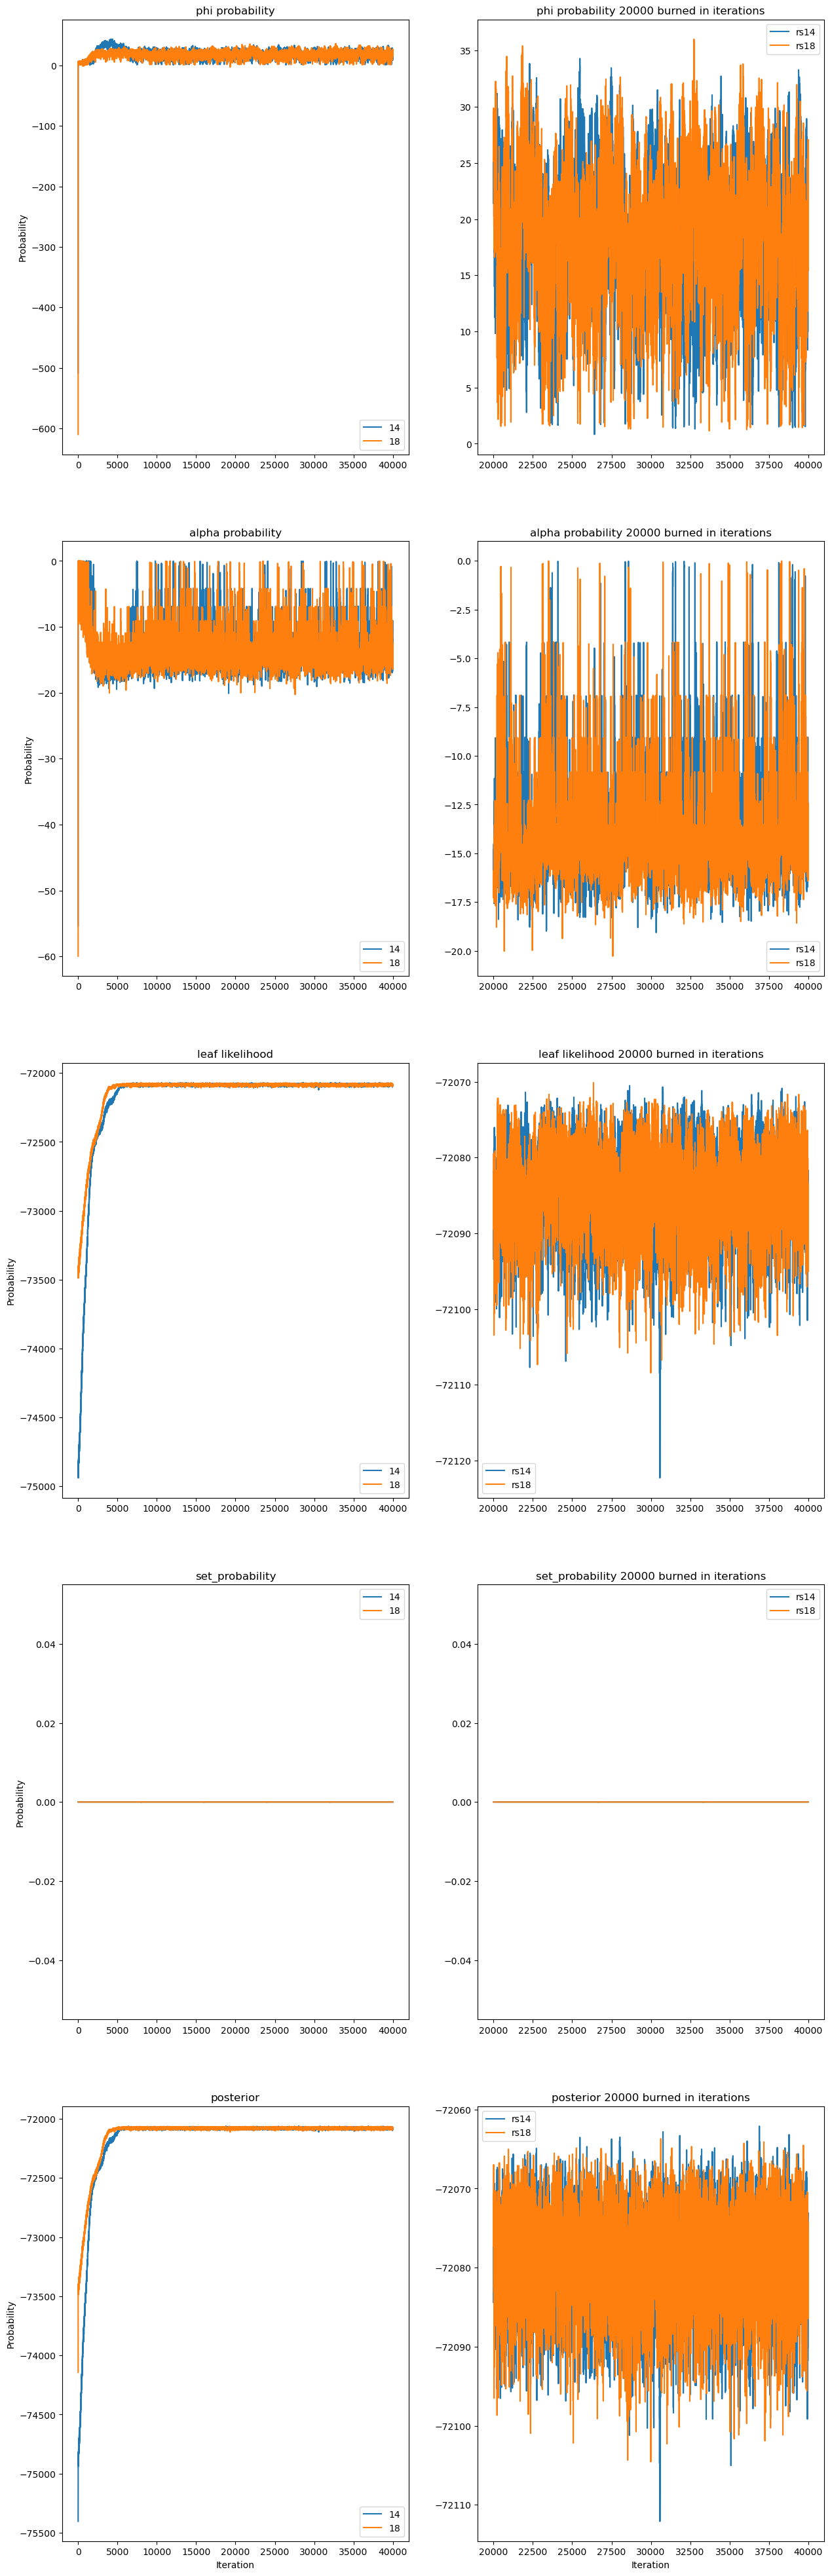

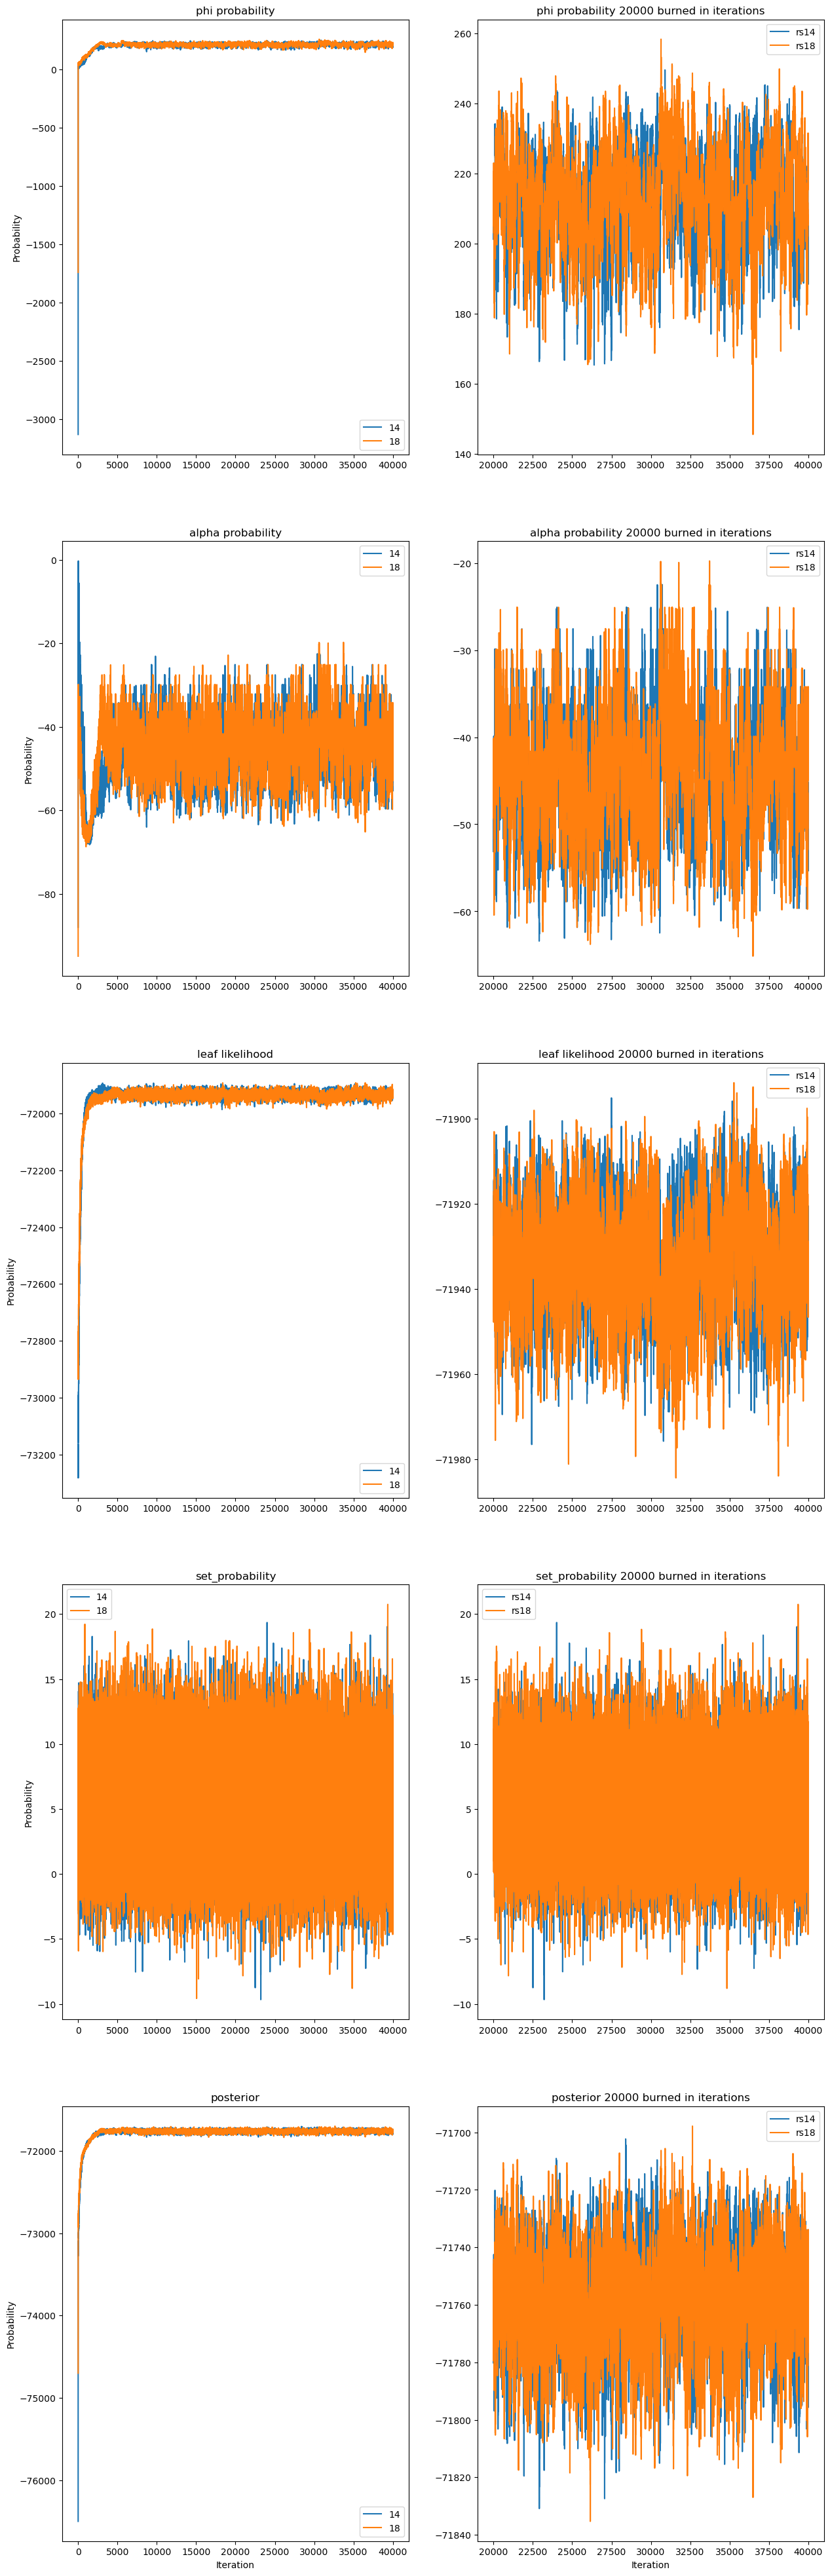

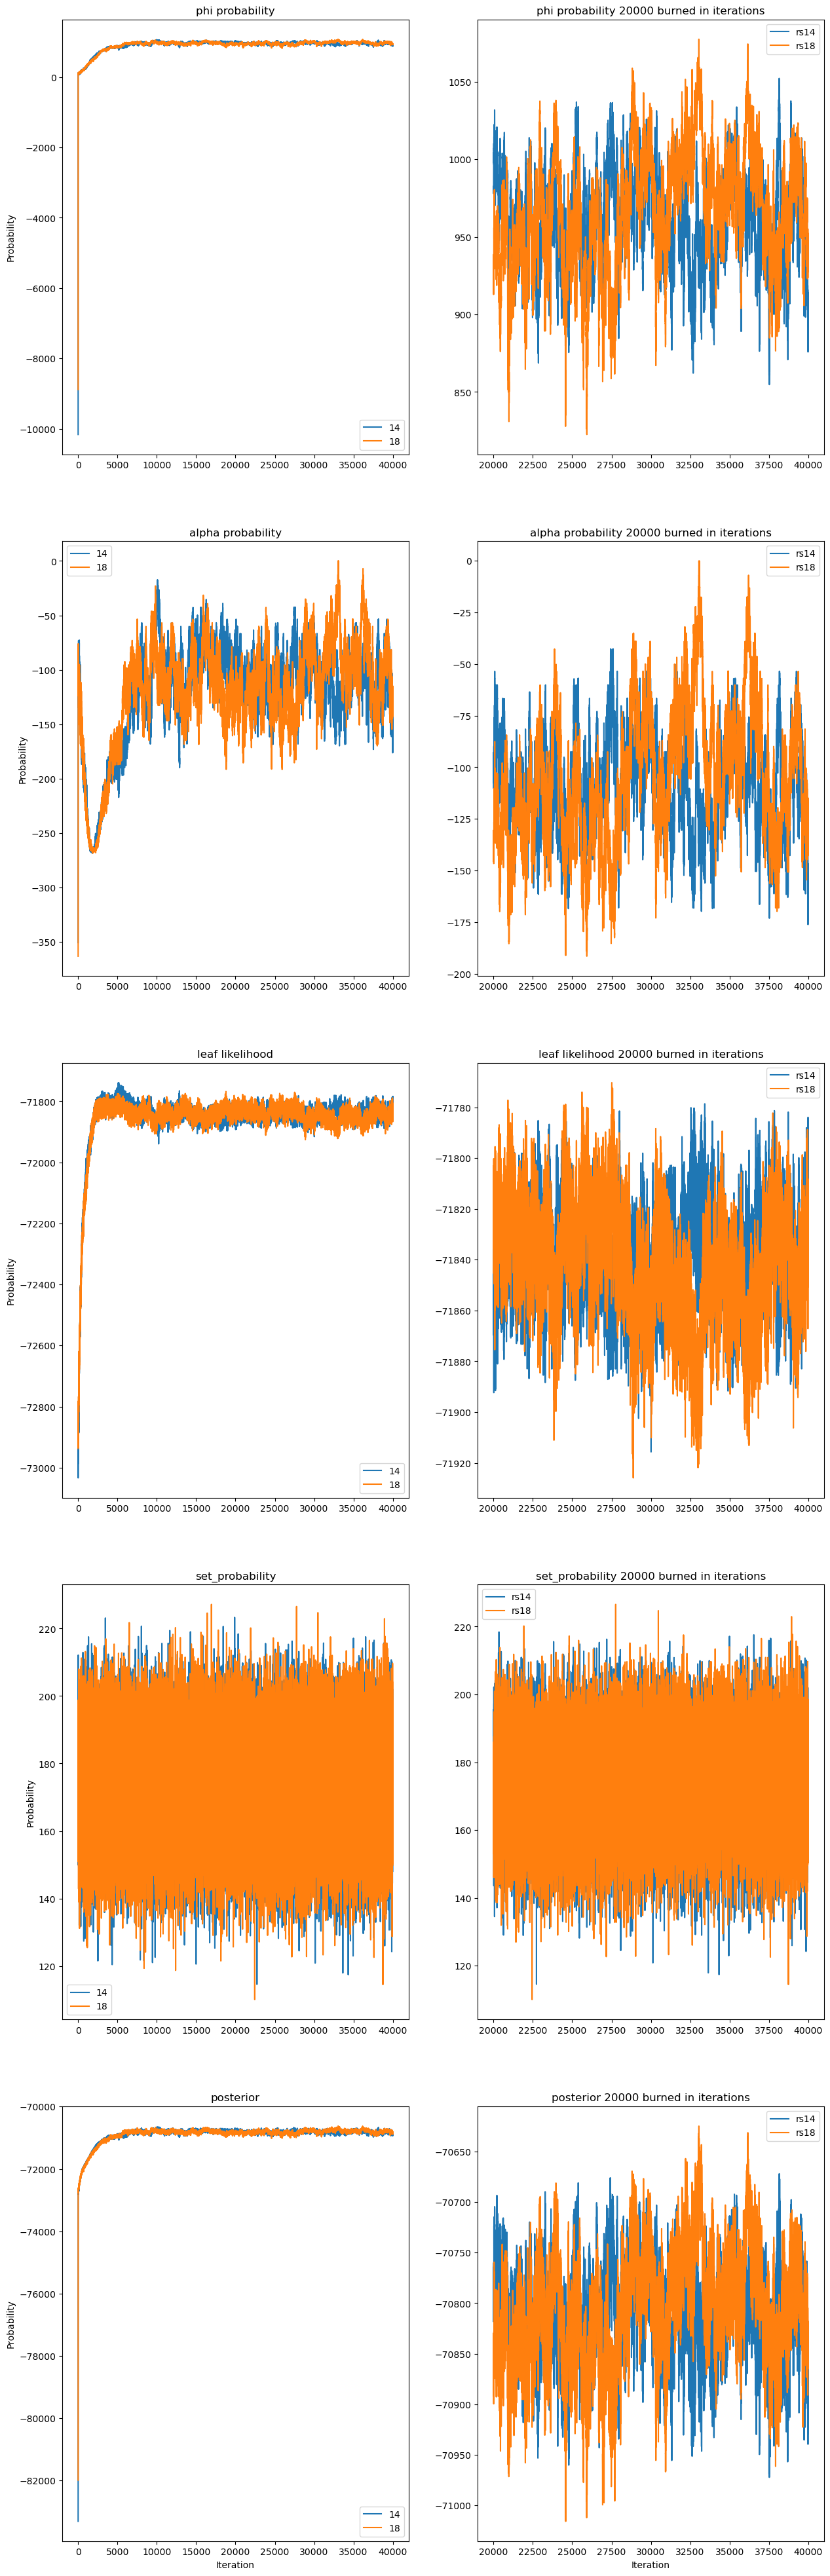

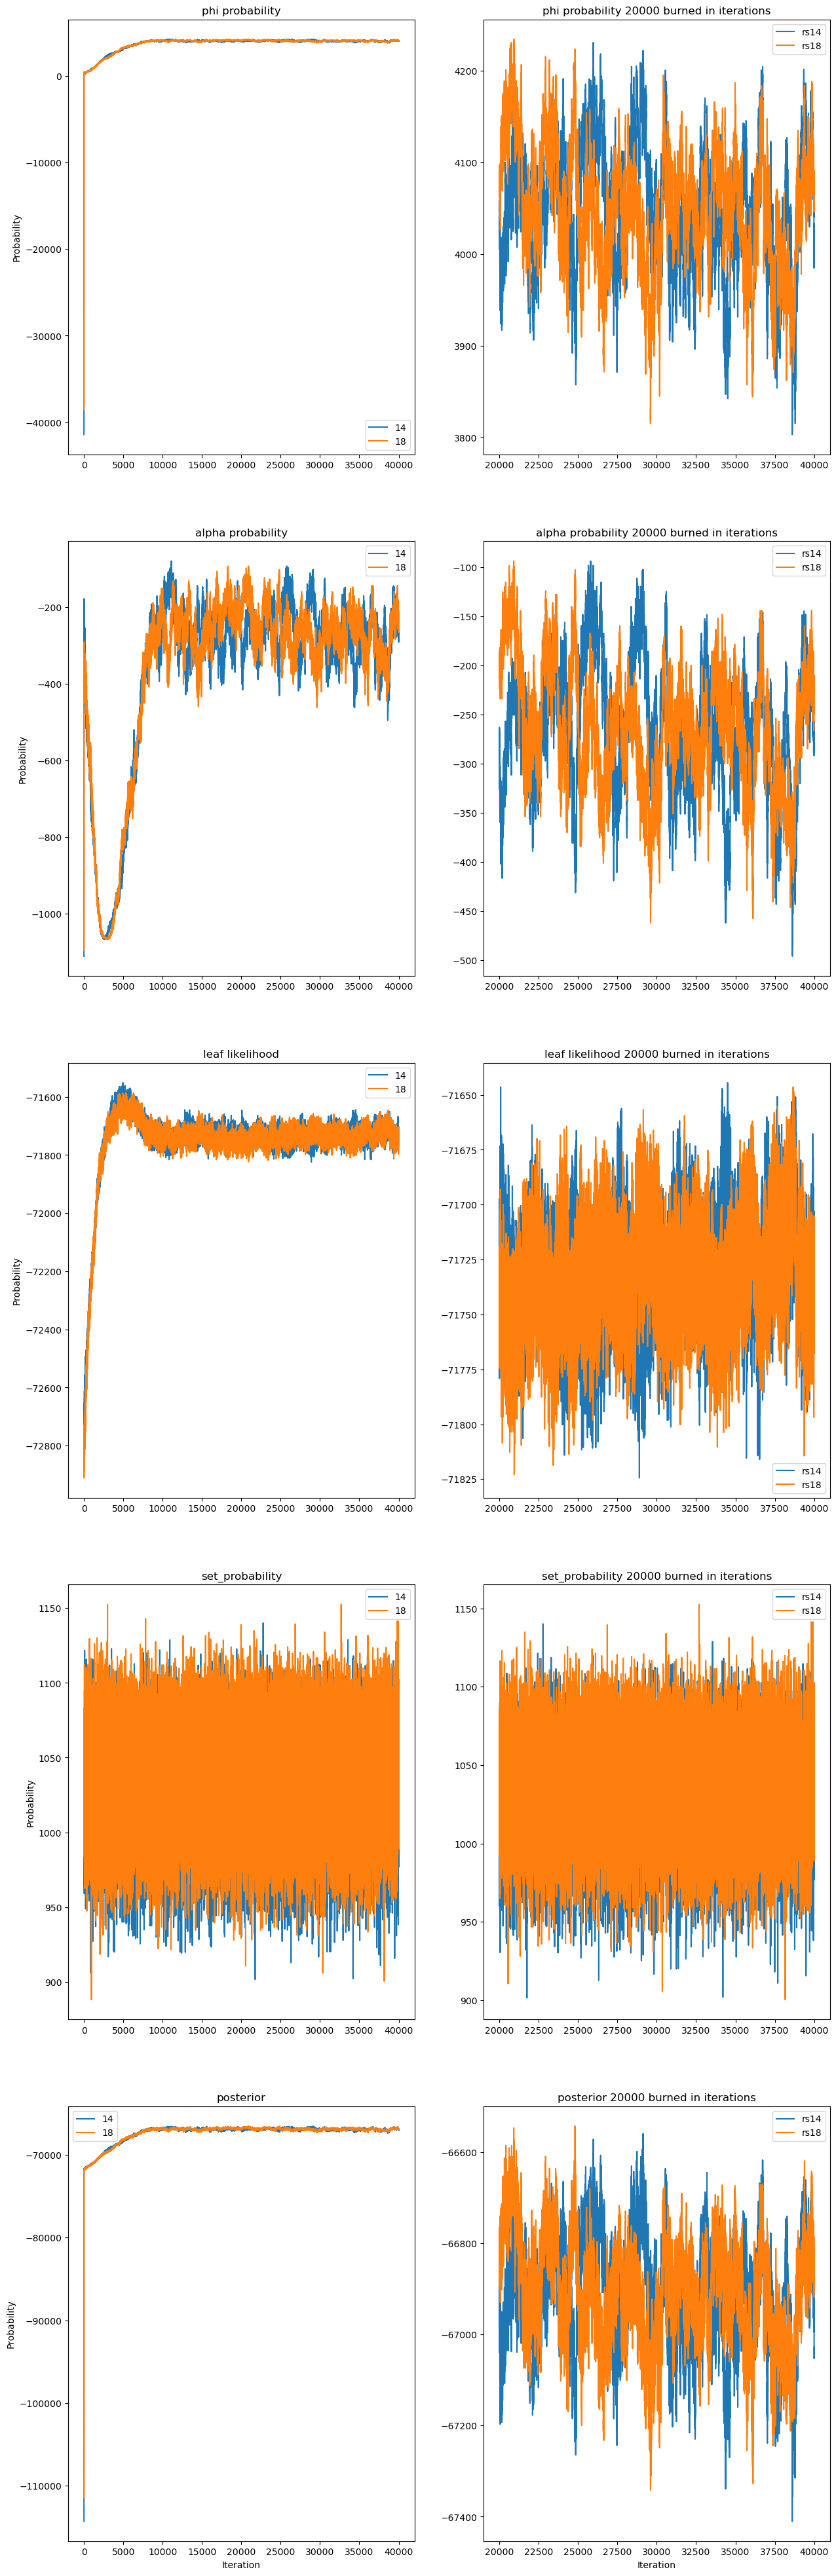

In [11]:
from baymer import plot_baymer_posterior_distributions

parameter_config_file = "tutorial_data/baymer_parameter_config.yaml"

# run baymer for the first random seed specified
plot_baymer_posterior_distributions.driver(config_file = parameter_config_file)

This script emits:
* point estimates of the mean mutation probabilities (stored here in json format here: tutorial_data/tutorial_outs/tutorial_baymer_out/AFR/ALL_outplots/rate_dicts/ )
* plots of the posterior probabilities and likelihoods for each layer (stored here: tutorial_data/tutorial_outs/tutorial_baymer_out/AFR/ALL_outplots/ )
* plots of the parameter values for the indicator and alpha parameters for each layer (stored here: tutorial_data/tutorial_outs/tutorial_baymer_out/AFR/ALL_outplots/ )

##### Visualize phi plot for specific context

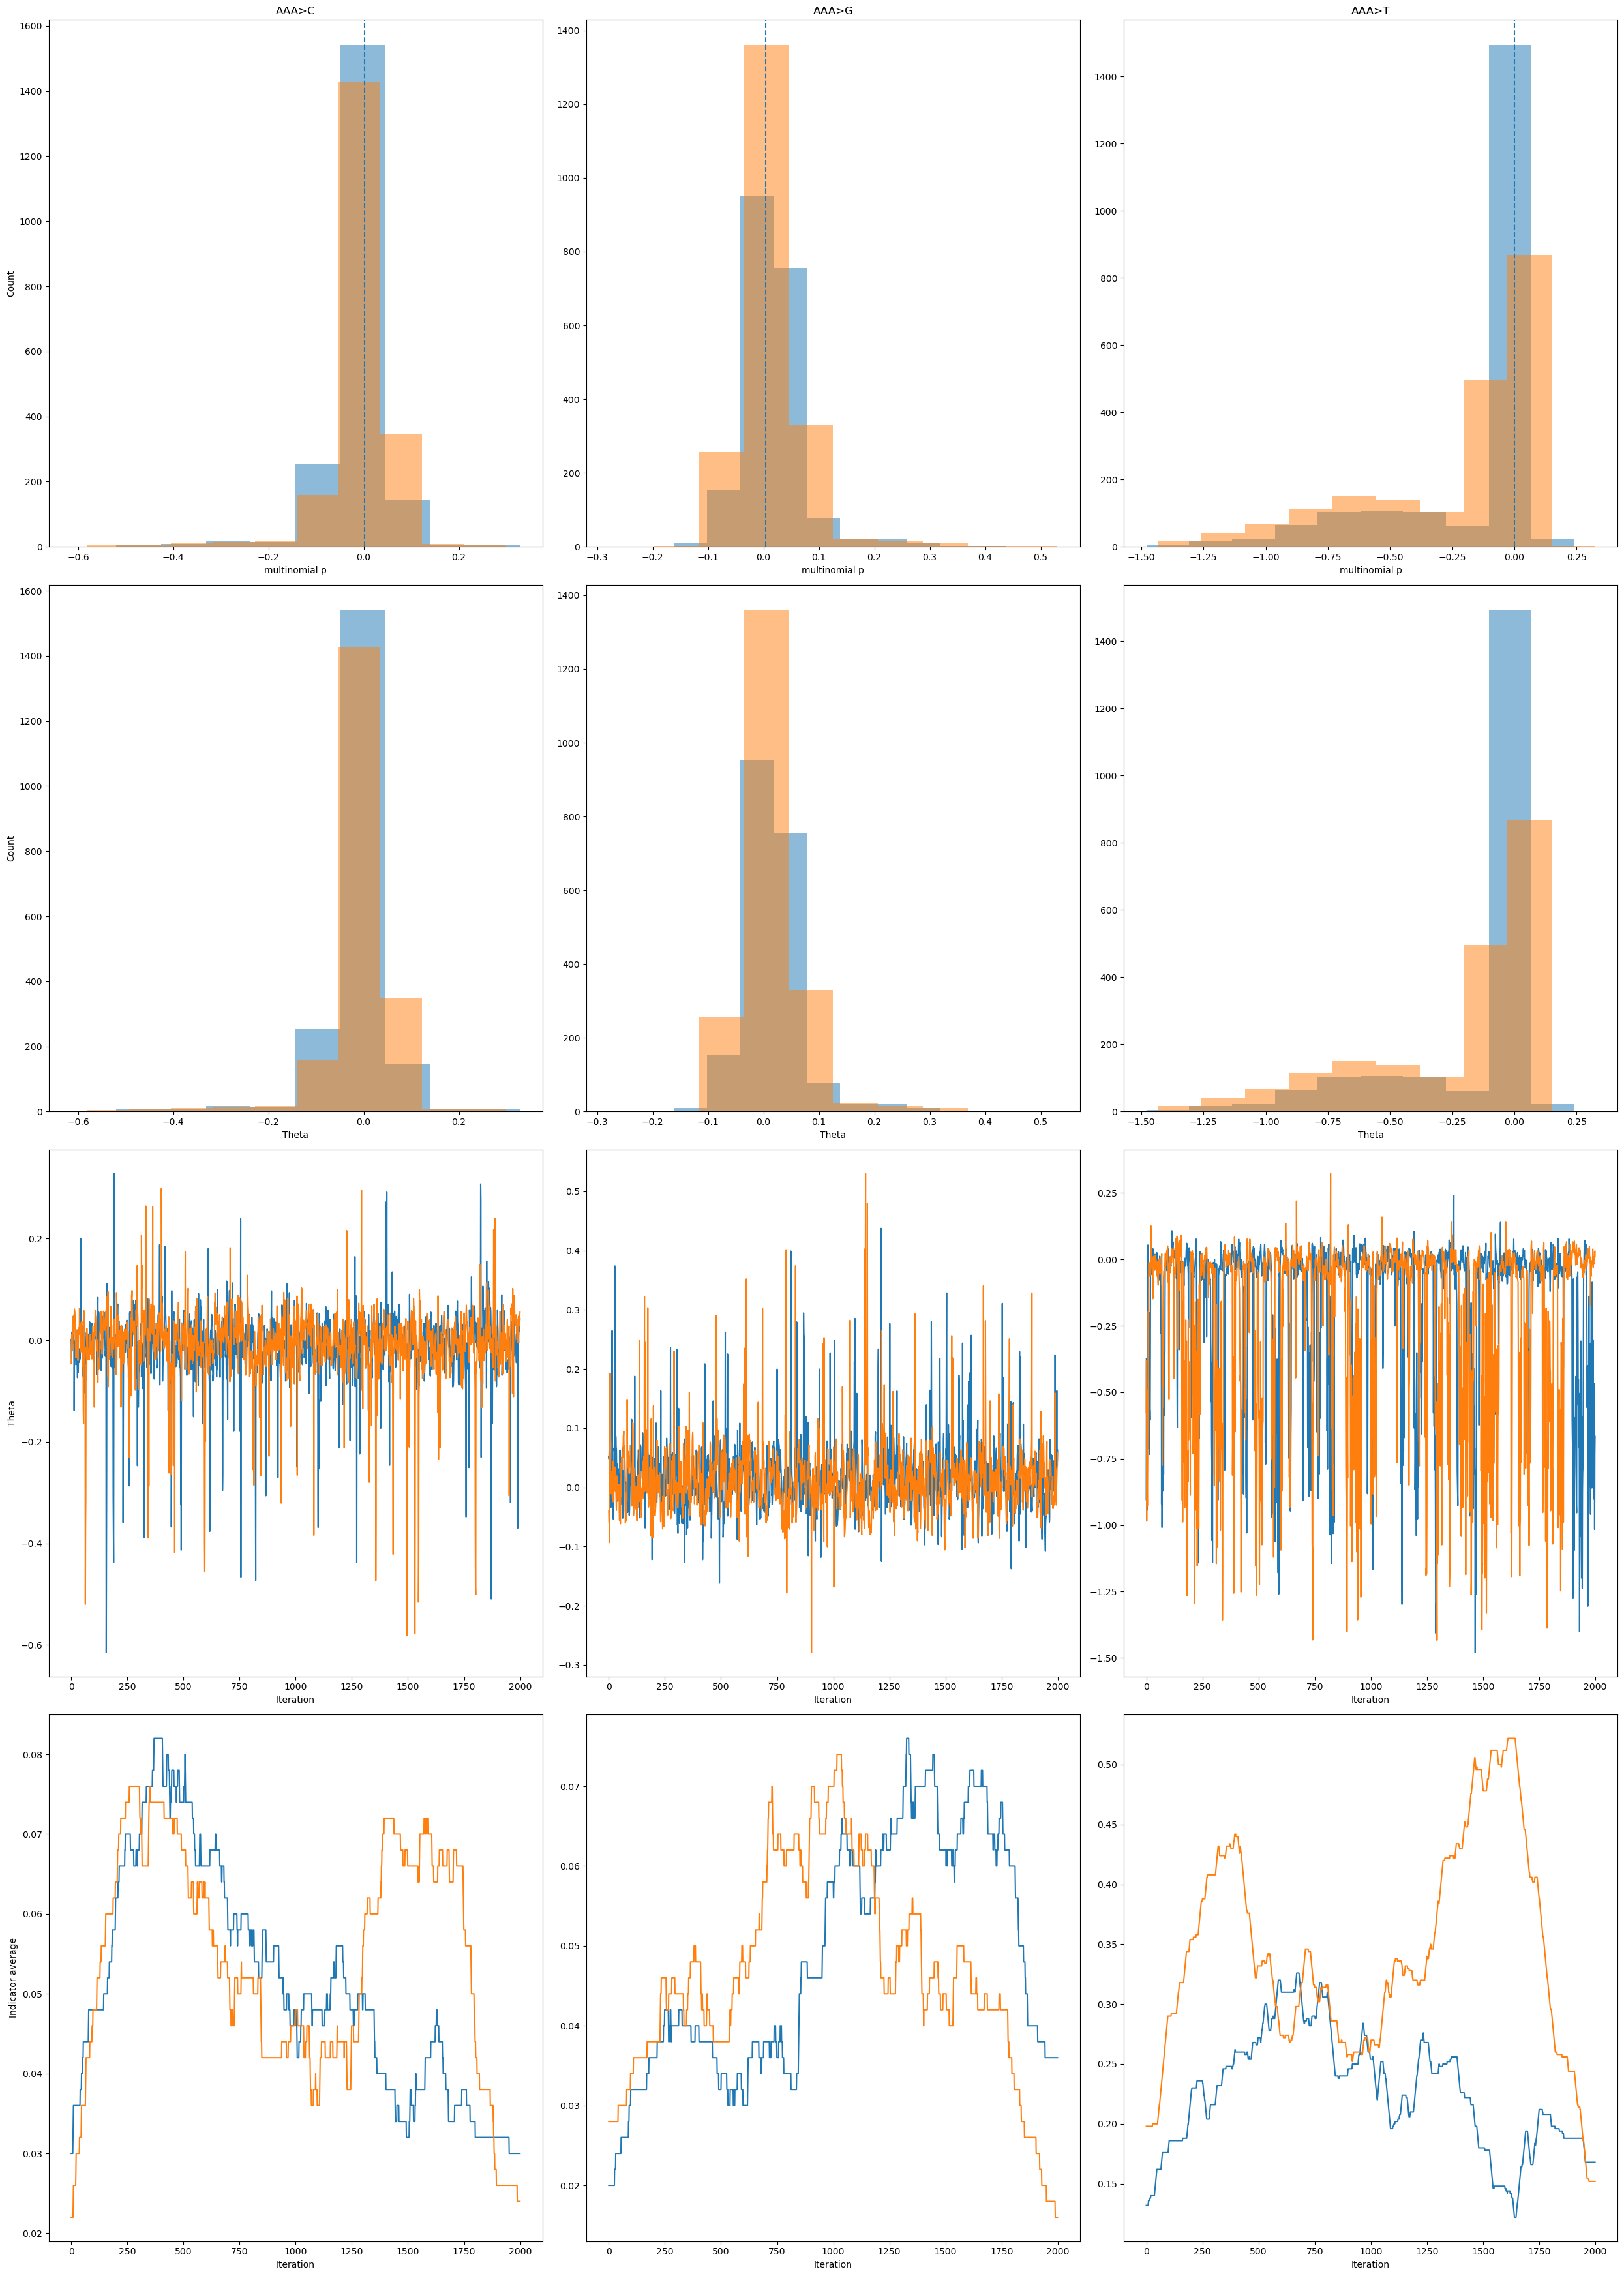

In [12]:
import baymer
from baymer import plot_baymer_posterior_distributions
data_config_file = "tutorial_data/tutorial_outs/tutorial_jsons/AFR/1_5mer.ALL.AFR.cpg_islands.hardcoded_count_files.yaml"
parameter_config_file = "tutorial_data/baymer_parameter_config.yaml"
plot_baymer_posterior_distributions.phi_plot(config_file = parameter_config_file,
                                             context_string = "AAA",
                                             empirical_value_config_file = data_config_file)